# Project 4 Webscrapping 
## Part 1 - webscrapping portion only 

Websites to consider 

- https://www.indeed.com.sg/jobs?q=data+analyst&l=singapore <br>
- https://jobscentral.com.sg/jobsearch?q=data%20scientist<br>
- https://www.jobstreet.com.sg/en/job-search/job-vacancy.php?ojs=10&key=data+scientist<br>
- https://www.jobsbank.gov.sg/ 
- sg.jobsdb
- efinancialcareers
- glassdoor
- mycareersfuture (data anlyst, data scientist, data engineer) (G:Business analyst, business intelligence, AI scientist, AI engineer, statician) 
- stjobs

In [4]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
from time import sleep

### Step 1: attempting to scrap mycareersfuture.sg without using Selenium 

In [2]:
# Using Beautiful soup 

url = 'https://www.mycareersfuture.sg/search?search=data%20analyst&page=0'
response = requests.get(url)
html = response.text
soup = BeautifulSoup(html, 'lxml')
# [item.a.text for item in soup.findAll('div',{'class':"quote"})]

In [11]:
soup

<!DOCTYPE html>\n<html>\n<head>\n<title>\n    MyCareersFuture \n  </title>\n<meta content="MyCareersFuture " property="og:title"/>\n<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." property="og:description"/>\n<meta content="https://www.mycareersfuture.sg" property="og:url"/>\n<meta content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" property="og:image"/>\n<meta content="MyCareersFuture" property="og:site_name"/>\n<meta content="website" property="og:type"/>\n<meta content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" name="google-site-verification"/>\n<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs 

### Step 2: Using Selenium scrap list of job urls off the first page 
Note: could not find the information that I want 

#### a) start selenium 

In [5]:
import os
from selenium import webdriver

#CHANGE THIS WITH THE RIGHT PATH!
chromedriver = "/chromedriver/chromedriver"
os.environ["webdriver.chrome.driver"] = chromedriver

# Create a driver called "driver."
driver = webdriver.Chrome(executable_path="./chromedriver/chromedriver")

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Search results | MyCareersFuture</title>
<meta content="MyCareersFuture " property="og:title"/>
<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." property="og:description"/>
<meta content="https://www.mycareersfuture.sg" property="og:url"/>
<meta content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" property="og:image"/>
<meta content="MyCareersFuture" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" name="google-site-verification"/>
<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have c
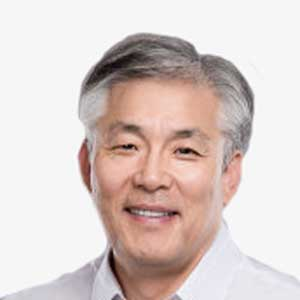
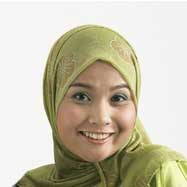
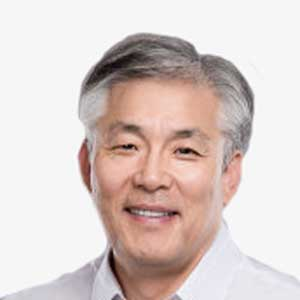
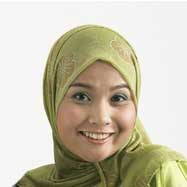
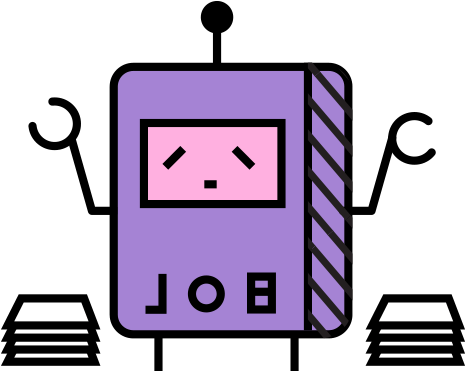
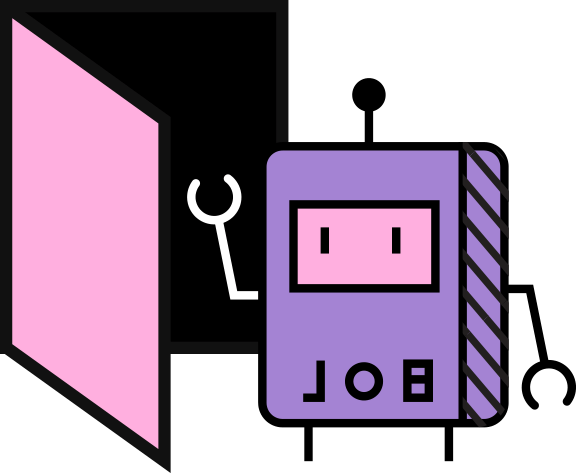
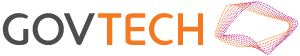
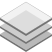
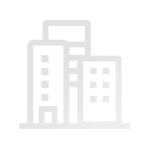
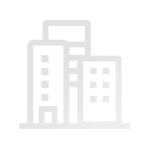
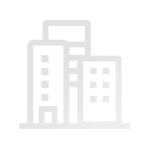
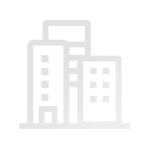
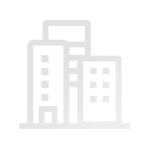
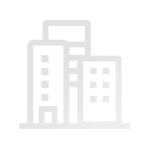
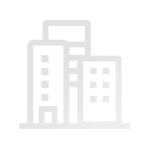
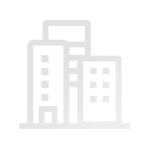
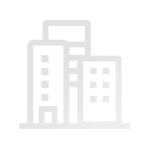
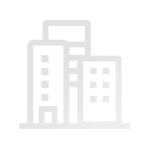
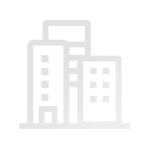
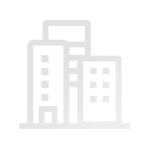
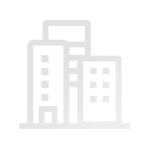
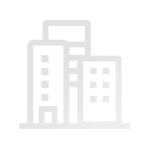
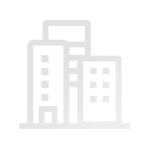
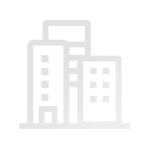

In [6]:
driver.get('https://www.mycareersfuture.sg/search?search=data%20analyst&page=0')
sleep(6)
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
print soup

#### b) Find the url of the first job

In [9]:
first_job = soup.findAll('div',{'class':'card relative '})[1]
first_job.findAll('a')[0].get('href')

'/job/data-analyst-woodpecker-asia-tech-67ce36cc784f7ee60186475f4ba54583'

#### c) check if can find url of all the jobs in the page 
yes we can. Tallies the number of jobs in the page as well. 

In [12]:
all_jobs_urls = ['https://www.mycareersfuture.sg'+job.findAll('a')[0].get('href') for job in soup.findAll('div',{'class':'card relative '})]
print len(all_jobs_urls)
all_jobs_urls

20


['https://www.mycareersfuture.sg/job/data-analyst-matchmove-pay-86ebe88fe7b85e3335bad7f048422e82',
 'https://www.mycareersfuture.sg/job/data-analyst-woodpecker-asia-tech-67ce36cc784f7ee60186475f4ba54583',
 'https://www.mycareersfuture.sg/job/global-cds-operations-onetouch-data-analyst-bcd-travel-asia-pacific-e620539c8c20f99cb559c828582b48b4',
 'https://www.mycareersfuture.sg/job/data-analyst-williams-sonoma-singapore-4dd42f1626f7ee319012572ccc356b2f',
 'https://www.mycareersfuture.sg/job/reinsurance-data-analyst-axa-insurance-40b4bfeec426ebba9a7dac277bcc3e45',
 'https://www.mycareersfuture.sg/job/data-analyst-data-scientist-teralytics-6ac2ae0d9d224ffc468970159fe74383',
 'https://www.mycareersfuture.sg/job/data-analyst-tuv-sud-asia-pacific-38003fbd39903c3ffe8cf3baea52db85',
 'https://www.mycareersfuture.sg/job/data-analyst-certis-cisco-security-9db8a7b217bf0a95c24c14634b22dc58',
 'https://www.mycareersfuture.sg/job/data-analyst-robert-walters-34106ccb0344c7fcd03251b595ef90eb',
 'https:/

#### d) check if we can scrap info off individual url_job

In [13]:
url_job = 'https://www.mycareersfuture.sg/job/data-analyst-st-engineering-aerospace-37061ef8f658f2ce2fa7e6e96ae9cf0e'
driver.get(url_job)
sleep(6)
html_job = driver.page_source
soup_job = BeautifulSoup(html_job, 'lxml')

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Data Analyst | MyCareersFuture</title>
<meta content="MyCareersFuture " property="og:title"/>
<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." property="og:description"/>
<meta content="https://www.mycareersfuture.sg" property="og:url"/>
<meta content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" property="og:image"/>
<meta content="MyCareersFuture" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" name="google-site-verification"/>
<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have con
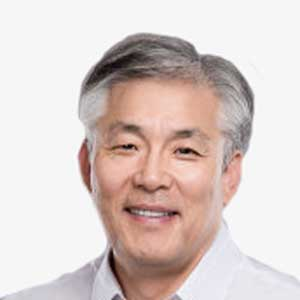
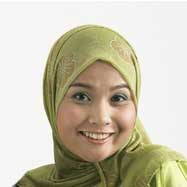
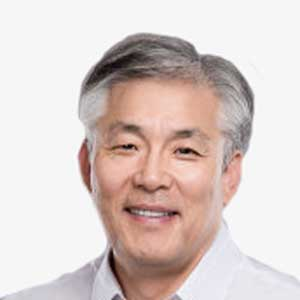
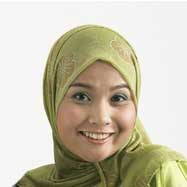
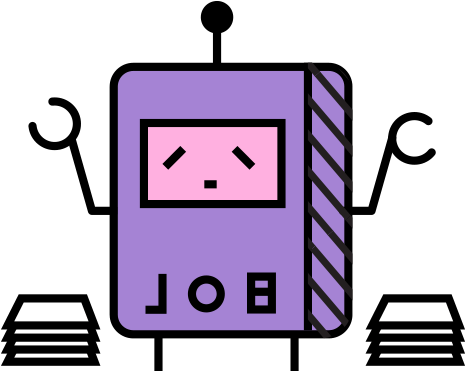
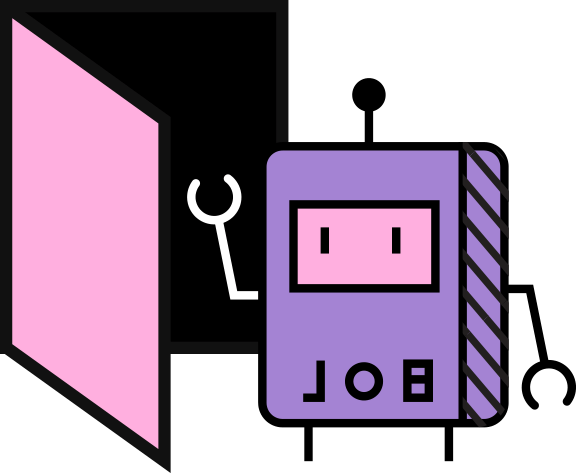
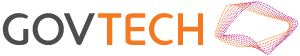
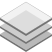
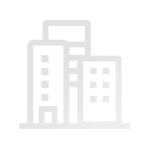
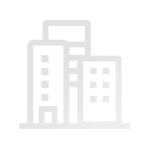

In [14]:
print soup_job

In [15]:
# To find title 
soup_job.findAll('h1',{'id':'job_title'})[0].text

u'Data Analyst'

In [16]:
# To find job company 
soup_job.findAll('p',{'id':'company'})[0].text

u'ST ENGINEERING AEROSPACE LTD.'

In [17]:
# To find employment type 
soup_job.findAll('p',{'id':'employment_type'})[0].text

u'Full Time'

In [18]:
#Salary
soup_job.findAll('div',{'class':'salary tr-l'})[0].text

u'Salary undisclosed'

In [19]:
# To find roles & responsibilities 
soup_job.findAll('div',{'id':'job_description'})[0].text.replace(u'\xa0',u'\n')

u'Roles & Responsibilities Educate project team members on analytic techniques and evangelise the benefits of data science to internal and external stakeholders. Develop and execute analysis plans by translating business requirements into technical designs for data acquisition, analysis and modelling, dashboards and performance metrics etc. Capture and evaluate the improvements to productivity and profitability for data analytic initiatives. Assist with the development of the company\u2019s overarching data strategy and implementation plans '

In [20]:
# find requirements 
soup_job.findAll('div',{'id':'requirements'})[0].text.replace(u'\xa0',u'\n')

u'Requirements Bachelors or Masters in data/business analytics or other related quantitative fields. Proficiency with programming and statistical software such as R, SPSS, Matlab, Python, Excel etc. Experience with handling data from SQL type relational databases. Experience with developing reports and visualisations with Qlikview will be an advantage. Experience with handling data from Hadoop and NewSQL databases will be an advantage. Applicants with no prior experience are welcome to apply. '

### Part 3) use for loops to obtain all our information 
#### a) use loops to obtain list of jobs 

In [ ]:
# check the last page number mannually 
# manually input the page number and loop through the search pages.
jobs_links = []
for pg_num in range(6):
    link = 'https://www.mycareersfuture.sg/search?search=data%20analyst&page={}'.format(pg_num)
    driver.get(link)
    sleep(3)
    html = driver.page_source
    soup = BeautifulSoup(html, 'lxml')

    jobs_links.extend(['https://www.mycareersfuture.sg'+job.findAll('a')[0].get('href') for job in soup.findAll('div',{'class':'card relative '})])

Is there a more 'automatic' way of iterating? 

<!DOCTYPE html>
<html xmlns="http://www.w3.org/1999/xhtml"><head>
<title>Search results | MyCareersFuture</title>
<meta content="MyCareersFuture " property="og:title"/>
<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have considered before, or find jobs with government support." property="og:description"/>
<meta content="https://www.mycareersfuture.sg" property="og:url"/>
<meta content="https://www.mycareersfuture.sg/images/og-mcf-logo.png" property="og:image"/>
<meta content="MyCareersFuture" property="og:site_name"/>
<meta content="website" property="og:type"/>
<meta content="cNK77SoJSM_t-TivaafxeOjn7sqTJDdi7TVwyMDLtLA" name="google-site-verification"/>
<meta content="The newest government initiative to help Singaporeans with a smarter way to find jobs. You can now search for jobs based on your skills, discover suitable jobs you might not have c
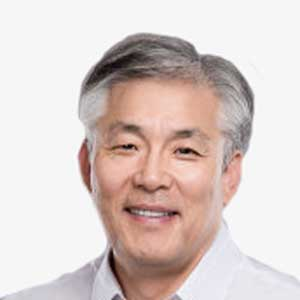
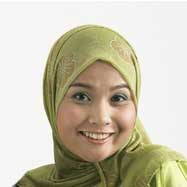
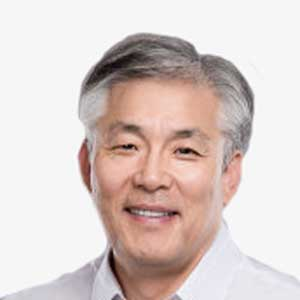
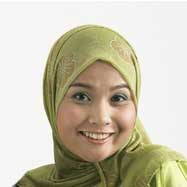
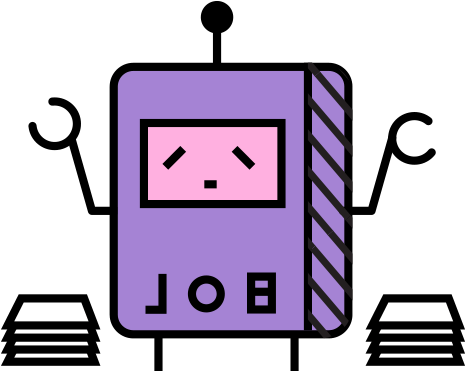
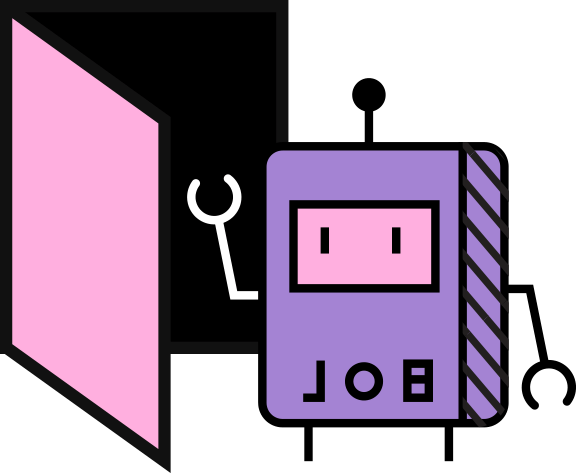
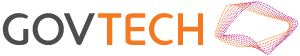
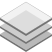

IndexError: list index out of range

In [29]:
# check what happens when the page exceed the number of jobs 
driver.get('https://www.mycareersfuture.sg/search?search=Data%20analyst&page=7')
sleep(6)
html = driver.page_source
soup = BeautifulSoup(html, 'lxml')
print soup
first_job = soup.findAll('div',{'class':'card relative '})[1]
first_job.findAll('a')[0].get('href')

In [31]:
# it will return an empty list 
soup.findAll('div',{'class':'card relative '}) == []

True

In [36]:
# set up a function such that 
# 1) it will automatically stop once there are no more entries (hence the while loop) 
# 2) it will return the list the jobs links 
def scrap_job_links(job):
    pg_num = 0
    jobs_links = []
    search_term = job.replace(' ','%20')
    
    while True: 
        link = 'https://www.mycareersfuture.sg/search?search={}&page={}'.format(search_term,pg_num)
        driver.get(link)
        sleep(6)
        html = driver.page_source
        soup = BeautifulSoup(html, 'lxml')

        if soup.findAll('div',{'class':'card relative '}) != []:
            jobs_links.extend(['https://www.mycareersfuture.sg'+job.findAll('a')[0].get('href') for job in soup.findAll('div',{'class':'card relative '})])
            pg_num += 1
        else:
            break
    
    return jobs_links

In [37]:
jobs_url_DataAnalyst = scrap_job_links('data analyst')

In [39]:
print len(jobs_url_DataAnalyst)
jobs_url_DataAnalyst

103


['https://www.mycareersfuture.sg/job/data-analyst-matchmove-pay-86ebe88fe7b85e3335bad7f048422e82',
 'https://www.mycareersfuture.sg/job/data-analyst-woodpecker-asia-tech-67ce36cc784f7ee60186475f4ba54583',
 'https://www.mycareersfuture.sg/job/global-cds-operations-onetouch-data-analyst-bcd-travel-asia-pacific-e620539c8c20f99cb559c828582b48b4',
 'https://www.mycareersfuture.sg/job/data-analyst-williams-sonoma-singapore-4dd42f1626f7ee319012572ccc356b2f',
 'https://www.mycareersfuture.sg/job/reinsurance-data-analyst-axa-insurance-40b4bfeec426ebba9a7dac277bcc3e45',
 'https://www.mycareersfuture.sg/job/data-analyst-data-scientist-teralytics-6ac2ae0d9d224ffc468970159fe74383',
 'https://www.mycareersfuture.sg/job/data-analyst-tuv-sud-asia-pacific-38003fbd39903c3ffe8cf3baea52db85',
 'https://www.mycareersfuture.sg/job/data-analyst-certis-cisco-security-9db8a7b217bf0a95c24c14634b22dc58',
 'https://www.mycareersfuture.sg/job/data-analyst-robert-walters-34106ccb0344c7fcd03251b595ef90eb',
 'https:/

In [40]:
jobs_url_DataScientist = scrap_job_links('data scientist')
jobs_url_DataEngineer = scrap_job_links('data engineer')

In [41]:
print len(jobs_url_DataAnalyst)
print len(jobs_url_DataScientist)
print len(jobs_url_DataEngineer)
print len(jobs_url_DataAnalyst + jobs_url_DataScientist +jobs_url_DataEngineer)

103
124
99


#### b) obtain unique links

In [42]:
all_jobs_urls = list(set(jobs_url_DataAnalyst + jobs_url_DataScientist +jobs_url_DataEngineer))

In [43]:
len(all_jobs_urls)

299

#### c) loop through all the unique URLS to obtain the information 

In [44]:
# set up a list of failed_urls in the case where there isn't the information we want, we can still manually inspect
failed_url = []
jobs_df = pd.DataFrame(columns = ['job_title','company','employment_type','salary','roles_responsibilities','requirements'])

for url_job in all_jobs_urls:
    driver.get(url_job)
    sleep(6)
    html_job = driver.page_source
    soup_job = BeautifulSoup(html_job, 'lxml')
    try: 
        new_job = { 
                    'job_title' : soup_job.findAll('h1',{'id':'job_title'})[0].text,
                    'company' : soup_job.findAll('p',{'id':'company'})[0].text,
                    'employment_type' : soup_job.findAll('p',{'id':'employment_type'})[0].text,
                    'salary' : soup_job.findAll('div',{'class':'salary tr-l'})[0].text,
                    'roles_responsibilities' : soup_job.findAll('div',{'id':'job_description'})[0].text.replace(u'\xa0',u'\n'),
                    'requirements' : soup_job.findAll('div',{'id':'requirements'})[0].text.replace(u'\xa0',u'\n')
                  }
        jobs_df = jobs_df.append(new_job,ignore_index=True)
    except:
        failed_url.append(url_job)

In [45]:
jobs_df

,job_title,company,employment_type,salary,roles_responsibilities,requirements
0,Senior Data Engineer,THOUGHTWORKS PTE. LTD.,Full Time,"$5,700to$11,200Monthly","Roles & ResponsibilitiesSingapore, SingaporeTh...","RequirementsIdeally, you should have -\n 5+ y..."
1,Data Scientist,Company Undisclosed,Full Time,Salary undisclosed,Roles & Responsibilities​Our Client is an esta...,Requirements Ph.D. or Master’s Degree in opera...
2,Data Engineer,ADDSTONES SAS,Permanent,"$5,000to$10,000Monthly",Roles & ResponsibilitiesGFI is an internationa...,RequirementsDeep analytical skills : \n Busin...
3,Senior Building Services Engineer (Data Centre),PM ASIA PROJECT SERVICES PTE. LTD.,"Permanent, Contract","$5,500to$8,000Monthly",Roles & ResponsibilitiesOverall Job Objectives...,Requirements Minimum Degree in Engineering or ...
4,Datastage Consultant,INFINITE COMPUTER SOLUTIONS PTE LTD,Full Time,"$3,000to$5,000Monthly",Roles & ResponsibilitiesJob Description Respon...,RequirementsKey Qualification: *Degree in Comp...
5,O&T - Data Analyst Lead - 18035524,CITIBANK N.A.,Full Time,"$10,000to$17,500Monthly",Roles & Responsibilities You will interface wi...,"Requirements BA/BS degree required, advanced d..."
6,Research & Development - Data Scientist - Hair...,PROCTER & GAMBLE INTERNATIONAL OPERATIONS SA S...,"Permanent, Full Time","$6,000to$10,000Monthly",Roles & ResponsibilitiesAt P&G we leverage adv...,RequirementsWe are seeking leaders who has a P...
7,Data Scientist,COMTEL SOLUTIONS PTE LTD,Contract,"$7,000to$10,500Monthly",Roles & Responsibilities Define hypotheses and...,Requirements A Bachelor’s degree in Computer S...
8,DWH Consultant,ECNET LIMITED,Full Time,"$6,000to$7,000Monthly",Roles & ResponsibilitiesDesign a BI Solution M...,"RequirementsSSAS, SSIS, Microsoft SQL Server,\..."
9,"Data Analyst, Group Customer Analytics & Decis...",OVERSEA-CHINESE BANKING CORPORATION LIMITED,Permanent,"$5,000to$9,000Monthly",Roles & Responsibilities\n What you’ll do Work...,RequirementsGeneral Knowledge & Experience: o\...


In [46]:
failed_url

['https://www.mycareersfuture.sg/job/senior-data-scientist-ministry-defence-5c1ccde0c88175ea1c9008e14da2974e',
 'https://www.mycareersfuture.sg/job/assistant-manager-geoanalytics-singapore-land-authority-b23fcb205b704ea51612daa10d3f1695',
 'https://www.mycareersfuture.sg/job/principal-data-scientist-ministry-defence-aa96359d7cb97a0d08296301d9819104',
 'https://www.mycareersfuture.sg/job/senior-executive-data-services-singapore-land-authority-1b2f29e2357be220b73dd06ca4f407ad',
 'https://www.mycareersfuture.sg/job/business-analyst-government-technology-agency-9e6bb89686d7ae65bd6554890fd0ea0d',
 'https://www.mycareersfuture.sg/job/data-scientist-wecash-79622d8bff5f6b00843878c796d4f0ad',
 'https://www.mycareersfuture.sg/job/data-communication-engineer-iiot-middleware-government-technology-agency-ad2f20e7da63d1c96b9c2011e30ce276']

In [47]:
df = jobs_df.copy()

In [51]:
df['job_description'] = df['roles_responsibilities'] + ' ' + df['requirements']

In [54]:
df.drop(['employment_type','roles_responsibilities','requirements'],axis=1,inplace=True)

In [62]:
df.replace(to_replace=u'\n',value=u' ',inplace=True)

In [70]:
df.iloc[0,3].decode('utf-8')

u'Roles & ResponsibilitiesSingapore, SingaporeThoughtWorks Singapore is looking for talented engineers passionate about building large scale data processing systems to help\nmanage the ever-growing information needs of our clients.  \nYou will be responsible for -   Creating complex data processing pipelines, as part of diverse, high energy teams Designing scalable implementations of the models\n Hands-on programming based on TDD, usually in a pair programming environment Deploying data pipelines in production based on Continuous Delivery practices Advising clients on the usage of different distributed storage and computing\ntechnologies from the plethora of options available in the ecosystem  RequirementsIdeally, you should have -\n  5+ years of experience building and deploying large scale\ndata processing pipelines in a production environment Production-level hands-on experience working on\nHDFS, Java MapReduce, Hive, Apache Spark, Oozie etc. Solid understanding of YARN, Mesos, MPP 

In [73]:
df['job_description'] = df['job_description'].apply(lambda x: ''.join(char for char in x if ord(char) < 128))

In [75]:
df['job_title'] = df['job_title'].apply(lambda x: ''.join(char for char in x if ord(char) < 128))

In [58]:
df = df.replace(u'\u200b',u' ')

In [76]:
df.to_csv('webscrape_mycareersfuture_yenngee.csv')

In [77]:
df.shape

(292, 4)

In [81]:
df[df['salary']!='Salary undisclosed'].shape

(277, 4)